# Module 10: Markov Chain Monte Carlo (MCMC) - Part 1

## Introduction

Sometimes it is impossible to calculate the solutions to Bayesian equations analytically, so numerical methods are required. The Markov Chain Monte Carlo framework is a relatively computationally efficient way to explore the parameter space of the predictions produced by Bayesian problems.

## Learning Outcomes

In this module, you will:

* Work with likelihoods that follow exponential and normal distributions
* Learn about Monte Carlo sampling (Metropolis and Gibbs)
* Use the PyMC3 library to explore Monte Carlo sampling


# Readings and Resources

We invite you to further supplement the content in this module with the following recommended text.

Kruschke, J. (2015). Chapter 6 and 7 in *Doing Bayesian data analysis: A tutorial with R, JAGS, and Stan (2nd Ed.).* New York: Academic Press.


## Bayesian statistics framework

Recall from Module 9 that the Bayesian statistical framework proceeds as follows:

1. Identify the data relevant to the research questions. What are the measurement scales of the data? Which data variables are to be predicted, and which data variables are supposed to act as predictors?

2. Define a descriptive model for the relevant data. The mathematical form and its parameters should be meaningful and appropriate to the theoretical purposes of the analysis.

3. Specify a prior distribution on the parameters. The prior must pass muster with the audience of the analysis, such as skeptical scientists.

4. Use Bayesian inference to re-allocate credibility across parameter values. Interpret the posterior distribution with respect to theoretically meaningful issues (assuming that the model is a reasonable description of the data; see next step).

5. Check that the posterior predictions mimic the data with reasonable accuracy (i.e., conduct a “posterior predictive check”). If not, then consider a different descriptive model!

### Exponential Data

When we want to simulate a particular situation, we have to choose how to describe the data. The **exponential distribution** is often used for things like waiting times. In general, the amount of time you wait for something:

* can't be negative or zero,
* is likely to be small/unlikely to be big,
* and is more likely the larger the waiting time (monotonic)

Another reason that the exponential is so important is that it is **memoryless**. This term means that, if you've already been waiting for a few minutes, the amount of time you expect to keep waiting is the same.

For example, say the buses in a town have no schedule, i.e., they just wander around on their routes. Suppose that the distribution of arrival times is exponential. You come to a bus stop and wait. Two minutes later, someone else arrives. The expected time to wait for the bus for both of you is the same, even though you have been waiting longer.

Say a bus comes on average once every 10 minutes. The exponential distribution can be described as:

$$Y \sim Exp(\lambda)$$

The prior mean is $1/\lambda$.

When choosing a prior distribution, it's important to note that what we need to find is the **conjugate prior** of the likelihood distribution. In this case the likelihood distribution is exponential, and it turns out that the Gamma distribution is the conjugate prior of the exponential likelihood.

The Gamma distribution can be parameterized with shape constant $\alpha$ and rate constant $\beta$ such that the mean is $\frac{\alpha}{\beta}$ and the standard deviation is $\frac{\sqrt{\alpha}}{\beta}$. Since we know that the mean is 10, we can choose:

$$\Gamma(100,1000)$$

Thus the prior standard deviation is 1/100.

The bus is observed to come once every 12 minutes, i.e., $Y = 12$. How do we update our posterior given this data?

$$f(\lambda \mid Y) \propto f(Y \mid \lambda)f(\lambda)$$

$$\propto \lambda e^{-\lambda Y} \lambda^{\alpha - 1} e^{-\beta \lambda}$$

$$\propto \lambda^{(\alpha+1)-1} e^{-(\beta + Y) \lambda}$$

$$ \lambda \mid Y \sim \Gamma(\alpha + 1, \beta + Y)$$

$$ \sim \Gamma(101,1012)$$

$$\textrm{Posterior mean} = 101/1012 \sim 1/10.02$$

### Normal data with known variance

Data are distributed normally if:

$$X_i \sim N(\mu,\sigma_0^2)$$

(where $\mu$ and $\sigma_0$ is are the population mean and standard deviation).

A normal prior has a normal conjugate posterior:

$$prior \ \mu \sim N(m_0,s_0^2)$$

(where $m_0$ and $s_0$ are the sample mean and standard deviation).

The posterior can be calculated as follows:

$$f(\mu \mid \bar{x}) \propto f(\bar{x} \mid \mu) f(\mu)$$

where the posterior mean given the mean of the data is distributed as:

$$\mu \mid \bar{x} \sim N \Bigg( \frac{\frac{n \bar{x}}{\sigma_0^2} + \frac{m_0}{s_0^2}}{\frac{n}{\sigma_0^2} + \frac{1}{s_0^2}}, \frac{1}{\frac{n}{\sigma_0^2} + \frac{1}{s_0^2}}  \Bigg)$$

The mean $\mu$ can be rewritten as:

$$\frac{n}{n + \frac{\sigma_0^2}{s_0^2}}\bar{x} + \frac{\frac{\sigma_0^2}{s_0^2}}{n + \frac{\sigma_0^2}{s_0^2}}m_0$$

and the standard deviation is just

$$\frac{1}{\frac{n}{\sigma_0^2} + \frac{1}{s_0^2}}$$



**Example: normal data**

Suppose a chemist wants to measure the mass of a sample. Her balance has a known standard deviation $\sigma_0^2$ of 0.2 mg. By looking at the sample she thinks the mass is about 10 mg, and based on her previous experience, her uncertainty on the guess is 2 mg.

Thus, the prior has $m_0 = 10$ and $s_0 = 2$. 

After $n = 5$ measurements: data mean $\bar x = 10.5$

Updating her posterior:

Mean = 10.4999

Std. Dev = 0.080

The posterior mean shifted and the uncertainty dropped!

## Non-informative priors

We have seen several approaches to choosing priors. One additional approach is to be as objective as possible:
    
* Minimize the amount of information that goes into the prior
* Data would have maximum influence on the posterior

**Example: coin flip**

$$Y_i \sim Bernoulli(\theta)$$

(We use a Bernoulli distribution because it is appropriate for an experiment with binary yes-no outcomes.)

A non-informative prior implies a uniform distribution, with all values of $\theta$ equally likely:

$$\theta \sim Uniform[0,1]=Beta(1,1)$$

Effective sample size can be found from the sum of the parameters: 1+1 = 2 (the equivalent of having two data points: one head and one tail)


How can we reduce the information present? The smaller the information in the prior, the more importance is given to the data:

$$Beta(0.5,0.5) ... Beta(0.001,0.001) ... \to Beta(0,0)$$

But Beta(0,0) is not a proper prior. Why? (It's beyond the scope of this course, but if you integrate this between 0 and 1, you will get an infinite integral.)

$$Beta(0,0) \propto \theta^{-1}(1-\theta)^{-1}$$

Can we do inference with an improper prior?

The image below shows a selection of beta distributions with different shape parameters $a$ and $b$. The circled image shows a non-informative (flat) prior, with $a = b = 1$.

![mcmc_1.png](attachment:mcmc_1.png "Beta distribution")

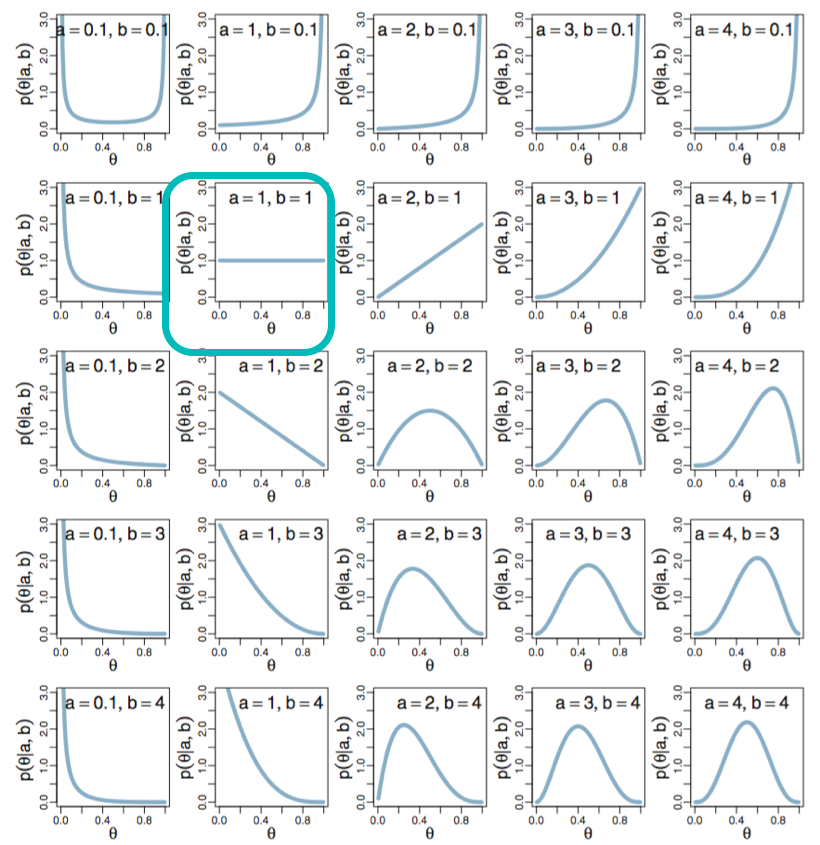

(source: Kruschke, J.K., "Doing Bayesian Data Analysis", 2nd. ed., 2015, pp. 128)

If we collect data, and as long as we observe at least one head and one tail, we can get a posterior:

$$Beta(y,n-y)$$

$$\textrm{posterior mean: } \frac{y}{n}=\hat{\theta}$$

In simple models, non-informative priors often produce posterior mean and estimates that are equivalent to the common frequentist/MLE estimates. 
We can still use these priors as long as the posterior distribution is proper. 
In addition to the point estimate, we can have a posterior distribution for the parameter, which allows us to calculate posterior probabilities.

#### EXERCISE 1

Let there be $n = 10$ data points $x_1, ..., x_{10}$ that are independent and identically distributed $\sim N(\theta, 1)$. Let the sample mean be $\bar x = 1.873$. Assume that $\theta \sim N(0, 5)$ *a priori*. Compute the mean and standard deviation of the distribution of $\theta$.

In [1]:
#your code here

In [2]:
#your code here

#### EXERCISE 1: SOLUTION

In [3]:
import math
n = 10
m_0 = 0
sigma_0_sqrd = 1
s_0_sqrd = 5
x_bar = 1.873

In [4]:
# N.B. the second term is zero because m_0 = 0!
mu = x_bar*(n/(n + (sigma_0_sqrd/s_0_sqrd))) + ((sigma_0_sqrd/s_0_sqrd)/(n + (sigma_0_sqrd/s_0_sqrd)))*m_0
mu

1.8362745098039217

In [5]:
sd = 1/((n/sigma_0_sqrd) + (n/s_0_sqrd))
sd

0.08333333333333333

### MCMC

Markov Chain Monte Carlo (MCMC) methods are used to produce accurate approximations to Bayesian posterior distributions. MCMC assumes that the prior and the likelihood are specified by a function that is easily computed, and results in an approximation of the posterior distribution, $p(\theta \mid D)$, in the form of a large number of $\theta$ values sampled from the distribution. Estimates can be used to calculate expected value, highest density intervals, etc.

Why would you need to do this? These problems become difficult when you have several parameters with a number of possible values. For example, say you have a model with six parameters, and each parameter can take 1000 possible values. This means that there are:

$${1,000^6} = 1,000,000,000,000,000,000$$

combinations!

Here we assume that the prior distribution is specified by an easily evaluated function.

It's usually impossible to get the underlying distribution exactly, so we can approximate this with a large sample. The larger the number of samples, the closer we can get to the underlying distribution. (The image below shows a $\textrm{beta}(\theta\mid15,7)$ distribution.)

![mcmc_2.png](attachment:mcmc_2.png "Sampling the underlying distribution")

(source: Kruschke, J.K., "Doing Bayesian Data Analysis", 2nd. ed., 2015, pp. 146)
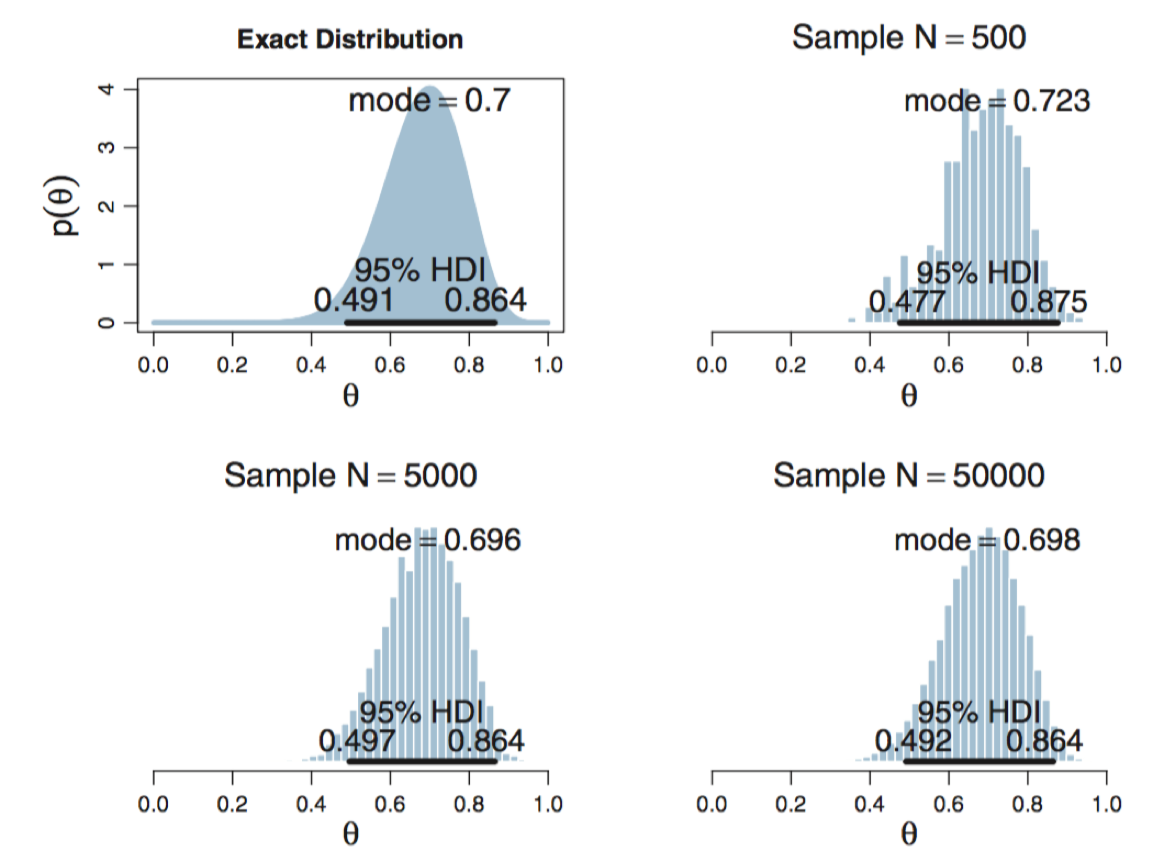

#### Example: the travelling politician

A politician wants to visit each island in a long chain of islands. Their goal is to visit each island proportional to their relative population (so the most time is spent on the most populated islands).

![mcmc_3.png](attachment:mcmc_3.png "Island chain")

The image above shows eight black islands in an arc. It depicts the Hawaiian island chain.

Unfortunately, the politician does not know:

* how many islands there are
* the total population of the islands

When they land on each island, they can find out:

* the population of the current island
* the populations of the two adjacent islands

Each day the politician must decide whether to:

* stay on the current island
* move to the island to the east
* move to the island to the west

How do they make this decision?
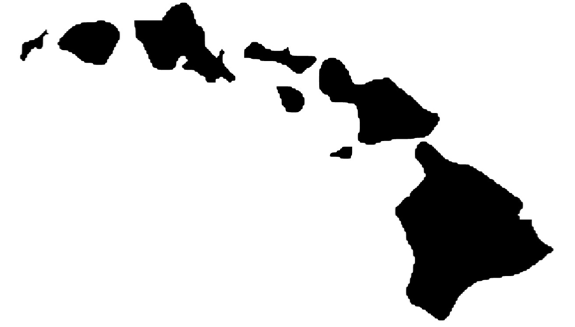

The heuristic for moving is:

* flip a fair coin to decide East or West
* if the proposed island has a higher population than the current island $\rightarrow$ move
* If proposed island population is smaller move with probability proportional to the population ratio:

$${P_{move} = \frac{P_{proposed}}{P_{current}}}$$

* In the long run, the probability that the politician is on any one of the islands matches the relative population of the island!

To see how this works, consider seven islands indexed by $\theta$ (i.e., $\theta$ ranges from 1 to 7) where the most western island is 1 and the most eastern island is 7. The relative populations of the islands increase linearly such that $P(\theta)=\theta$ (top panel in the figure below).

Then we draw the probability of being at position $\theta$ as a function of time; the middle panel shows this random walk. The bottom panel shows the frequency distribution of the positions in the random walk.

![mcmc_4.png](attachment:mcmc_4.png "Random walk")

(source: adapted from Kruschke, J.K., "Doing Bayesian Data Analysis", 2nd. ed., 2015, pp. 148)

Image description: three panels, all with 1-7 (values of $\theta$) on the horizontal axis. The top panel shows $\theta$ vs. $p(\theta)$ and is labelled True Position. It consists of seven vertical bars increasing in height from 1 to 7, showing the true population of the island chain. The second panel is labelled Random Walk, and plots $\theta$ against time step. Starting in the middle, a graph meanders left and right in a random fashion, with the majority of its points being on the right side (with the highest probability) by time step 500. The third panel is labelled Frequency Distribution, and plots $\theta$ against frequency. There are seven bars increasing in height as $\theta$ increases, showing that the frequency of being on the island increases with increasing $\theta$ (since $p(\theta)$ also increases with increasing $\theta$).
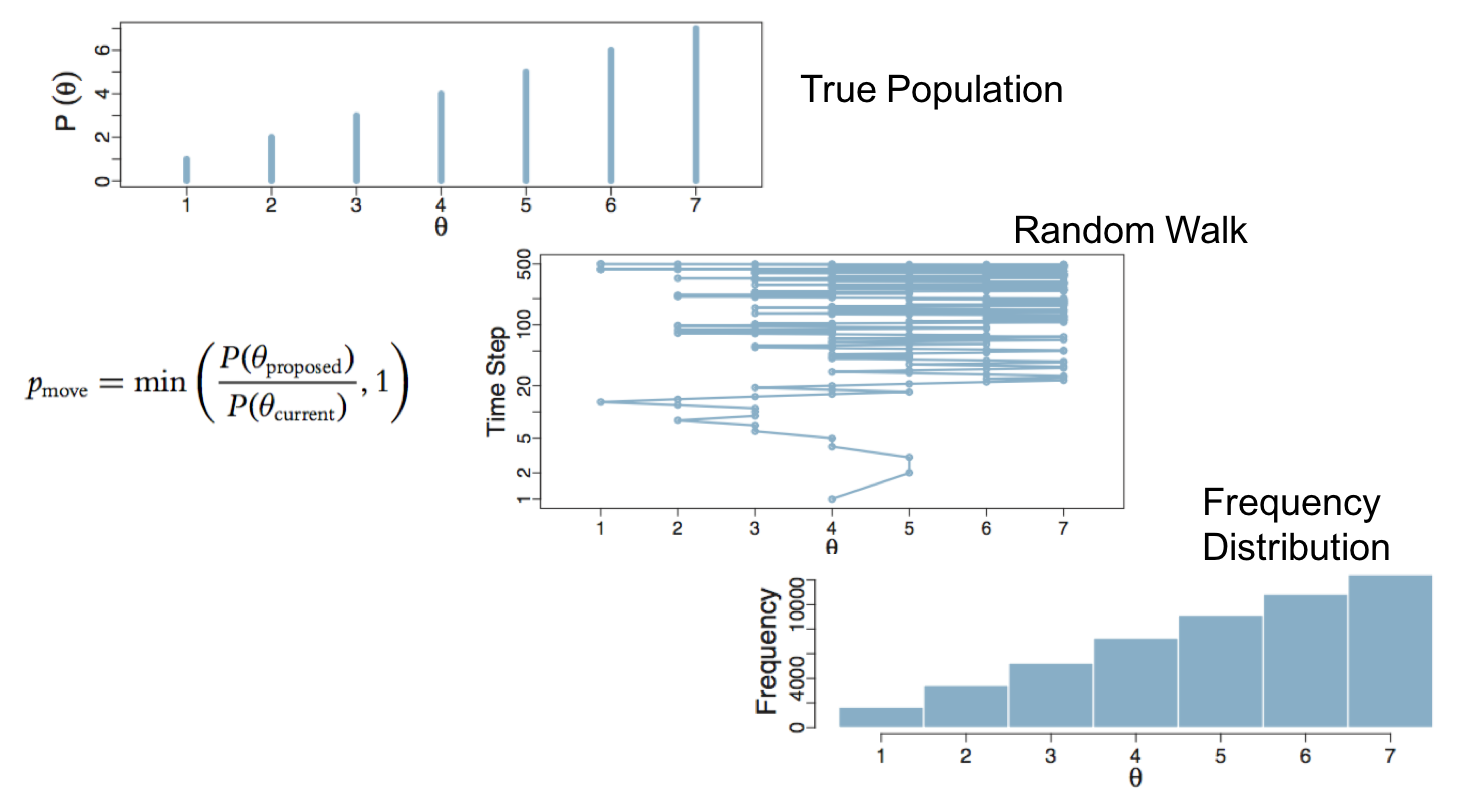

**CODE EXAMPLE**

In [6]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

We will start on island 4.

Text(0, 0.5, 'Time step')

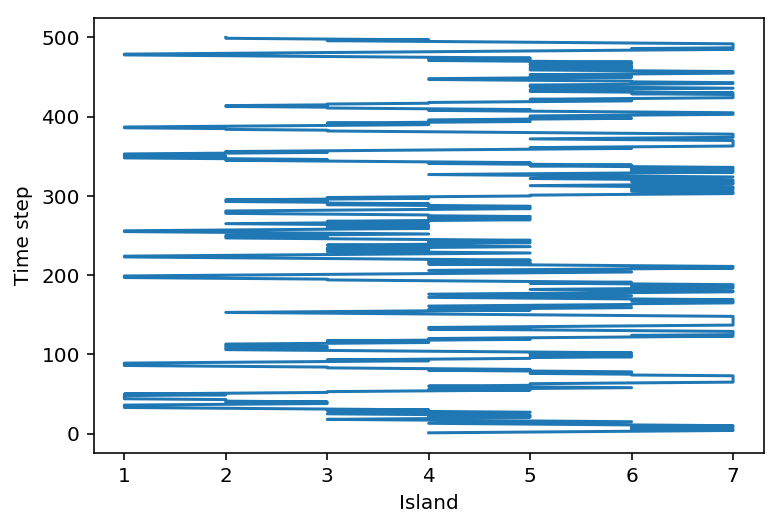

In [7]:
p_theta_current = 4
islands_visited = []

for time_step in range(0,500):
    
    # Record where we are
    islands_visited.append(p_theta_current)
    
    # Choose the direction we are going
    if np.random.rand() > 0.5:
        p_theta_proposed = p_theta_current + 1
    else:
        p_theta_proposed = p_theta_current - 1
        
    # Note that we cannot go further west than 1 or further east than 7
    if p_theta_proposed > 7 or p_theta_proposed < 1:
        p_theta_proposed = 0

    # Now choose whether we move
    p_move = min(p_theta_proposed/p_theta_current,1)
    if np.random.rand() < p_move:
        p_theta_current = p_theta_proposed
        
plt.plot(islands_visited,range(1,501))
plt.xlabel('Island')
plt.ylabel('Time step')

You can see that more time is spent on the more highly-populated islands on the right of the graph.

### The Metropolis algorithm

There are several methods available that use the MCMC framework. In the previous section, we saw a simpler example of a more general case called the Metropolis algorithm. In this simple case, we used discrete positions, in one dimension, with moves that only went one step east or west. In the general case, the same algorithm can be applied to continuous values, in any number of dimensions, and with more general proposal distributions.

The essentials of the method are the same as for the simple case:

* We must have some target distribution $P(\theta)$, over a multidimensional continuous parameter space, from which we would like to generate representative sample values

* We must be able to compute the value of $P(\theta)$ for any candidate value of $\theta$

* The distribution, $P(\theta)$, does not have to be normalized; it merely needs to be non-negative

* In typical applications, $P(\theta)$ is the unnormalized posterior distribution on $\theta$, i.e., it is the product of the likelihood and the prior

Proposal distributions can take on many different forms, with the goal being to use a proposal distribution that efficiently explores the regions of the parameter space where $P(\theta)$ has most of its mass.

You can look at the code above to see how the following was implemented for the example of the travelling politician.

* Start at an arbitrary initial value of $\theta$ (in the valid range)

* Randomly generate a proposed jump

* Compute the probability of moving to the proposed value

$$p_{move} = \textrm{min}\bigg(1,\frac{P(\theta_{pro})}{P(\theta_{cur})}\bigg)$$


* Accept the proposed parameter value if a random value sampled from a [0,1] uniform distribution is less than $p_{move}$

* Otherwise reject the proposed parameter value and tally the current value again

* Repeat the above steps until it is judged that a sufficient representative sample has been generated

* **NOTE:** if the proposed value $\theta_{pro}$ happens to land outside the permissible bounds of $\theta$, the prior and/or likelihood is set to zero, hence $p_{move}$ is zero

#### Example: coin flip

Now let's use this algorithm on a different example: we flip a coin $N$ times and observe $z$ heads.

We'll use a $\textrm{beta}(\theta\mid 1,1)$ prior and a proposal distribution that is normally distributed with mean $\mu$ and standard deviation (SD) $\sigma$. Setting $\mu = 0$ means that the proposed jump $\Delta\theta$ is going to be close to the current position, and larger magnitudes will be less likely than smaller magnitudes.

The larger the SD, the larger the proposed jumps, as shown below for $N = 20$ and $z = 14$:

![mcmc_5.png](attachment:mcmc_5.png "Changing Metropolis step")

The left panel, with $\sigma = 0.02$, shows a chain that takes a long way to move from the starting value and that does so very gradually. The right panel, with $\sigma = 2$, shows a chain that has a lot of large proposed jumps, which means that they are often rejected, as they stray far from the bulk of the posterior distribution. The middle panel, with $\sigma = 0.2$, shows an intermediate chain that visits a variety of representative values in just a few steps. (N.B., $N_{pro}$ = number of proposed jumps, and $N_{acc}$ = number of accepted proposals.)

It's important to note that regardless of the proposal distribution used, when run for long enough, the Metropolis algorithm will eventually produce an accurate representation of the posterior distribution. But the **effective size** of the chain (the equivalent number of values if they were sampled independently of each other) gives us an indication of how good the approximation is, and the effective size of the middle panel is clearly larger than those of the left and right panels.
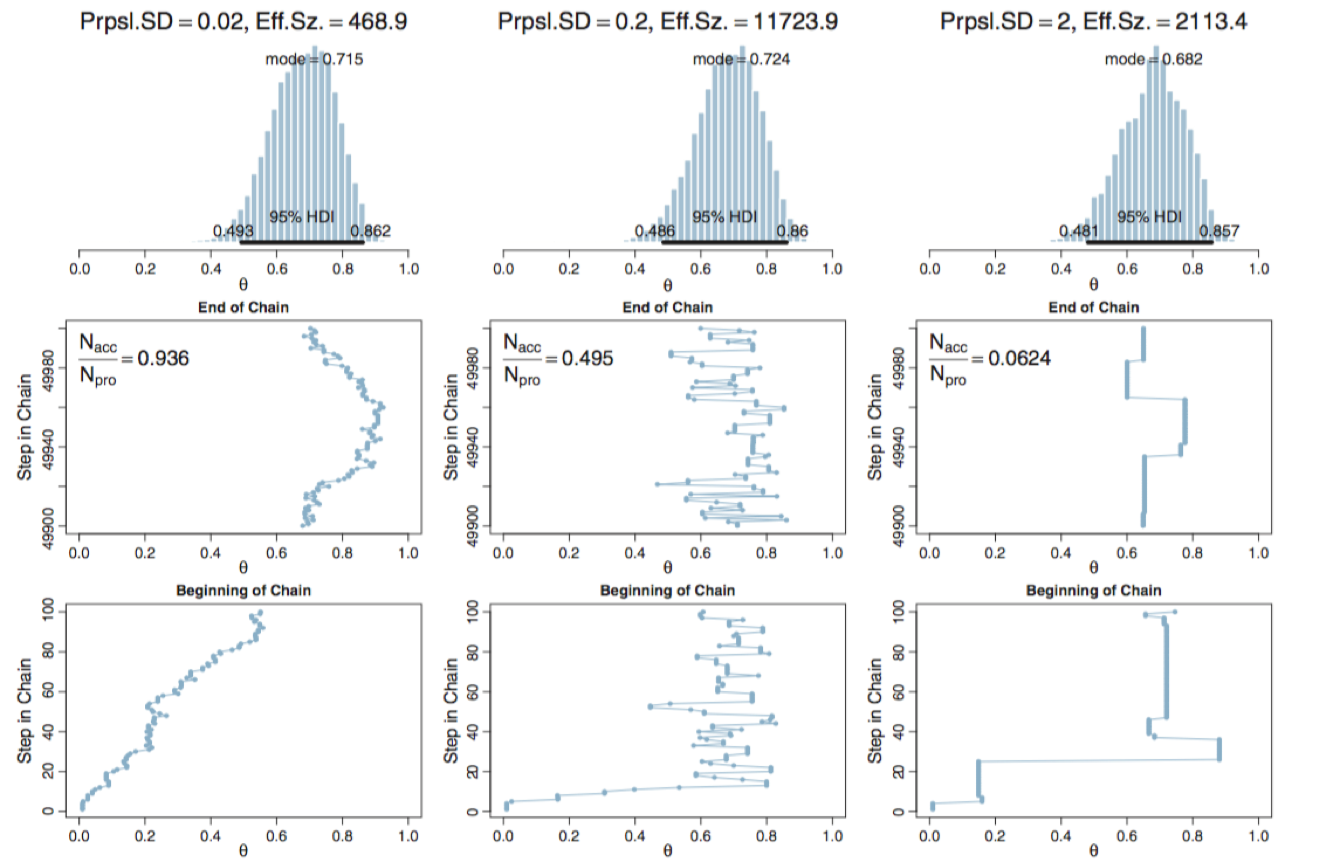

#### Two-dimensional prior, likelihood and posterior

Now let's consider a situation where there are *two* biases, $\theta_1$ and $\theta_2$. Let's use the example of two coins, one from Canada and one from India. (N.B., It's important that the data we gather from the two coins is independent, otherwise the methods from this section do not apply.)

To estimate the parameters $\theta_1$ and $\theta_2$ we must specify what we believe about them. And because they form a probability density function, their integral across the parameter space must be 1. For simplicity we will assume that our beliefs about the Canadian coin are independent from our beliefs about the Indian coin. Recall that independence means that:

$$p(\theta_1,\theta_2) = p(\theta_1)p(\theta_2)$$

for every value of $\theta_1$ and $\theta_2$, where $p(\theta_1)$ and $p(\theta_2)$ are the marginal belief distributions.

Additionally, we also have some observed data. Assuming that $\theta_1$ and $\theta_2$ are independent:

$$p(y_1\mid \theta_1,\theta_2) = p(y_1\mid \theta_1)$$

and

$$p(y_2\mid \theta_1,\theta_2) = p(y_2\mid \theta_2)$$

The posterior distribution is now derived in the usual way with Bayes' rule, but now with two parameters:

$$p(\theta_1,\theta_2 \mid D) = \frac{p(D\mid \theta_1,\theta_2) \cdot p(\theta_1,\theta_2)}{p(D)}$$

To conceptualize this a little better, we can plot the probability densities as a function of two parameters, $\theta_1$ and $\theta_2$, on two horizontal axes, with the density itself on the vertical axis. 

The prior is a product of independent beta distributions:

$$\textrm{beta}(\theta_1 \mid a_1,b_1) \cdot \textrm{beta}(\theta_2 \mid a_2,b_2)$$

and we can see a perspective (left) and surface (right) plot of this here:

![mcmc_6.png](attachment:mcmc_6.png "2D prior")

Image description: the left panel is a 3D mesh plot labelled Prior of $\theta_1$ and $\theta_2$ vs. $p(\theta_1,\theta_2)$. The surface is symmetrical and has a shallow peak in the centre. The right panel shows a contour plot of $\theta_1$ vs. $\theta_2$ in the form of two circles, a slice through the left panel.

This plot shows that the prior distributions are independent, because the shape of the profile along the slices does not change.

We have some data, $N_1$, $z_1$, $N_2$, and $z_2$, making our likelihood function:

$$\textrm{beta}(\theta_1 \mid z_1 + a_1,N_1-z_1+b_1) \cdot \textrm{beta}(\theta_2 \mid z_2+a_2,N_2-z_2+b_2)$$

Setting $N_1 = 8$, $z_1 = 6$, $N_2 = 7$, and $z_2 = 2$, we get:

![mcmc_7.png](attachment:mcmc_7.png "2D likelihood")

Image description: the left panel is a 3D mesh plot labelled Likelihood of $\theta_1$ and $\theta_2$ vs. $p(\theta_1,\theta_2)$. The surface has a sharp peak for high $\theta_1$ and low $\theta_2$. The right panel shows a contour plot of $\theta_1$ vs. $\theta_2$ in the form of several contours in the bottom right, a slice through the left panel.

Notice that the likelihood is maximized for $\theta$ values that match the proportions of heads in the data.

Finally, the resulting posterior distribution:

![mcmc_8.png](attachment:mcmc_8.png "2D posterior")

Image description: the left panel is a 3D mesh plot labelled Posterior of $\theta_1$ and $\theta_2$ vs. $p(\theta_1,\theta_2)$. The surface has a sharp peak for high $\theta_1$ and low $\theta_2$. The right panel shows a contour plot of $\theta_1$ vs. $\theta_2$ in the form of several contours in the bottom right, a slice through the left panel - though not as far to the bottom right as the likelihood.

We can see how the Metropolis algorithm explores this parameter space in the image below. In both panels, the points explore the bulk of the posterior distribution - the difference is that the left panel has a relatively small proposal SD (0.02), while the right panel has a larger one (0.2). In the left panel, each jump is usually accepted but yields relatively little information, so the effective sample size for each parameter is small (276 and 253.1). In the right panel, the jumps are larger, so the random walk explores the space more efficiently, giving a larger effective sample size for each parameter (6704 and 6349.4). However, in this case, the effective sample size is still much lower than the number of proposed jumps, because many of the jumps were not accepted. Still, we would prefer to use the algorithm in the right panel.

![mcmc_9.png](attachment:mcmc_9.png "Changing Metropolis step for 2D example")

In summary, in the limit of infinite random walks, the Metropolis algorithm yields arbitrarily accurate representations of the underlying posterior distribution.

To see this in action, <a href="https://www.youtube.com/watch?v=4I6TaYo9j_Y">here</a> is a demo of a simple 2D Metropolis sampler.
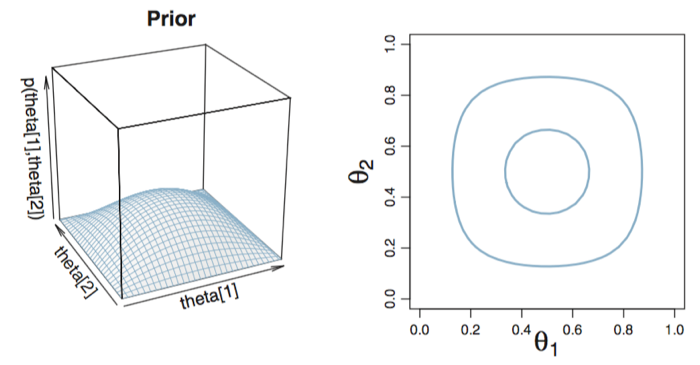
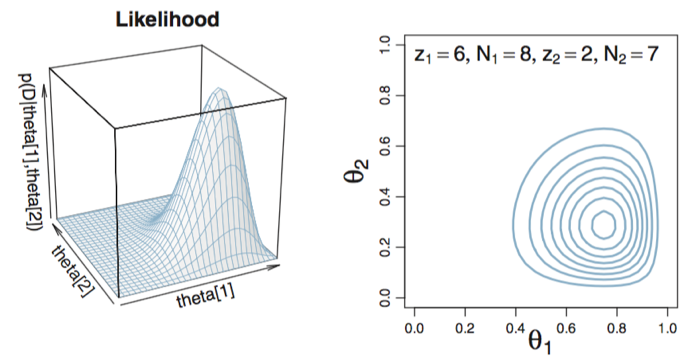
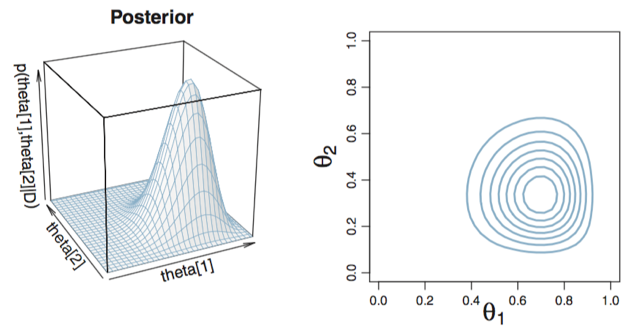
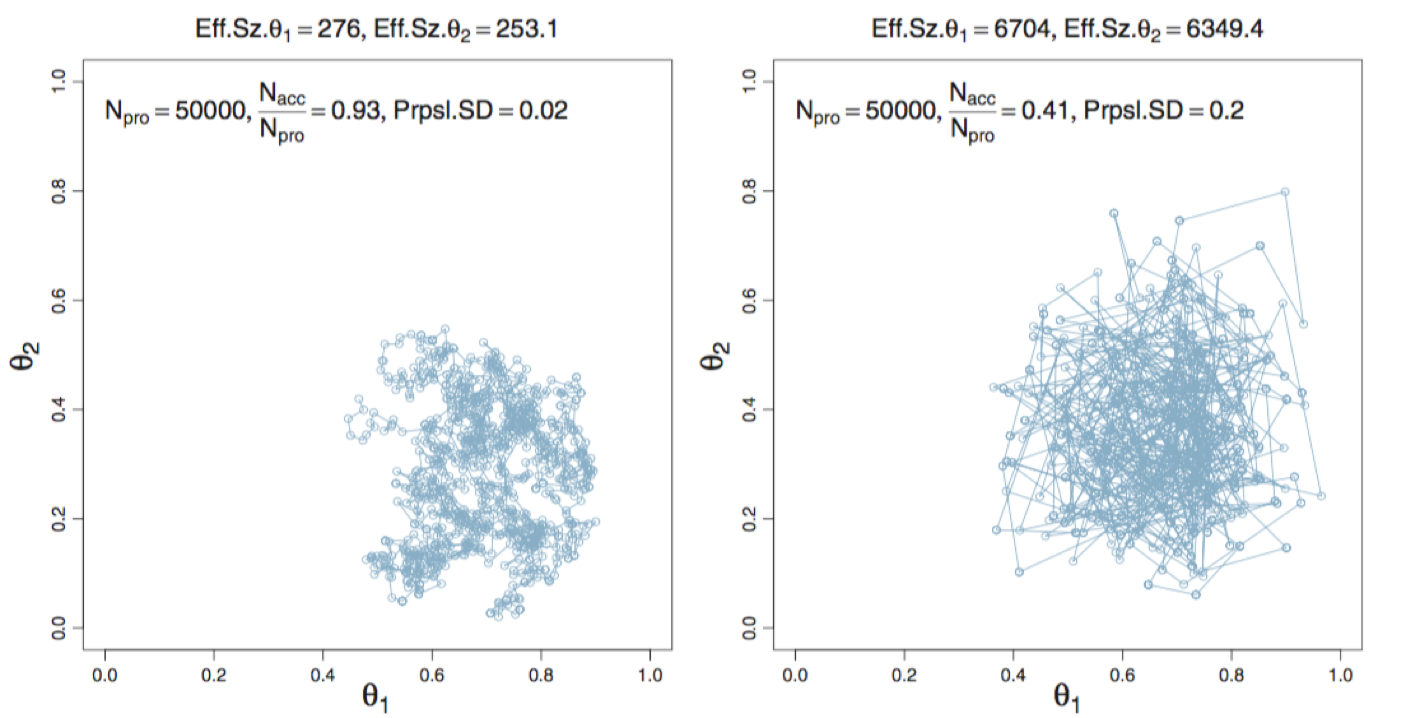

### Gibbs sampling

The Metropolis algorithm is very useful, but one issue with it, as we have seen, is that the proposal distribution must be properly tuned to the posterior distribution for it to work well. A more efficient method of sample generation is called Gibbs sampling, which is similar to Metropolis, except for how the steps are taken:

* At each point in the random walk, only one of the parameters is selected (typically they are cycled through in order to ensure that all parameters are represented; they could be selected randomly, but for complex models with many parameters it would take too many steps to ensure all were selected)

* The new value for the parameter $\theta_i$, combined with the other unchanged parameter values $\theta_j$, becomes the new position in the random walk

![mcmc_10.png](attachment:mcmc_10.png "Gibbs sampling")

Image description: a 3D mesh plot labelled Posterior of $\theta_1$ and $\theta_2$ vs. $p(\theta_1,\theta_2)$. The surface has a sharp peak for high $\theta_1$ and low $\theta_2$. A black line slicing through the distribution, with a black dot at the point being sampled, shows that one of the parameters is held constant while the other varies.

The image below summarizes the Gibbs algorithm for the same posterior distribution as shown in the previous section. The left panel shows all the intermediate steps of the chain, changing one parameter at a time; the right panel shows only the points after complete sweeps through both parameters. Compared with the Metropolis algorithm, you can see that the effective size is much larger for the same number of steps (25000 for each parameter).

![mcmc_11.png](attachment:mcmc_11.png "Gibbs sampling example")

Because the proposal distribution exactly mirrors the posterior probability for that parameter, the proposed jump is always accepted, meaning that there is no inefficiency of rejected proposals, and no requirement of tuning the proposal distribution.

However, for Gibbs sampling to be applicable, the conditional probabilities of each parameter on the others must be calculated, and the algorithm's progress can be stalled by highly correlated parameters.

You can see this in action 
<a href="https://www.youtube.com/watch?v=ZaKwpVgmKTY">here</a>.
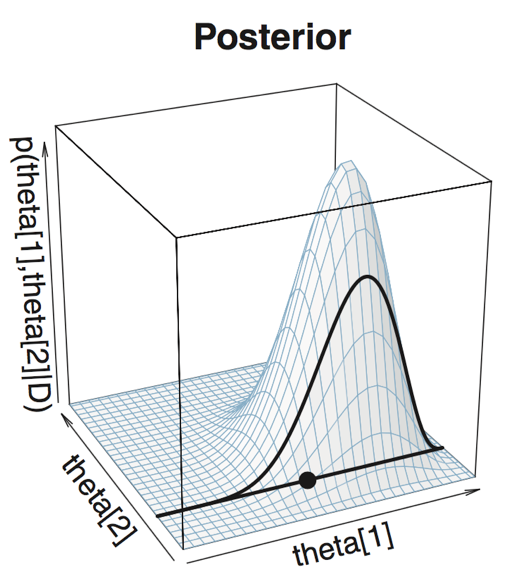
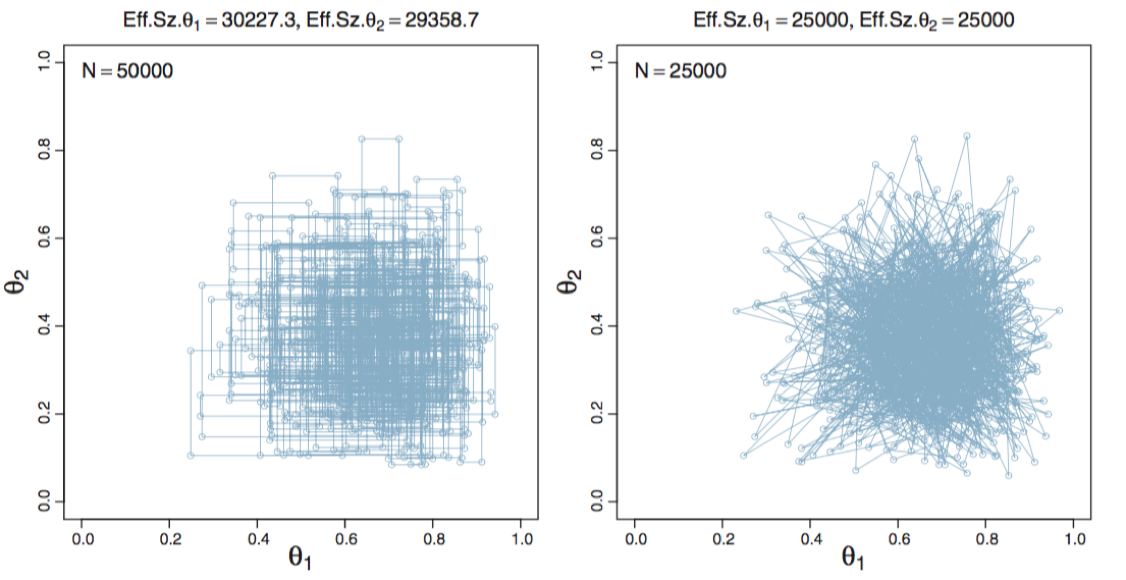

**EXERCISE 2**

Modify the code below to use Gibbs instead of Metropolis sampling.

In [8]:
# SETUP - DO NOT EDIT
def bern(theta, z, N):
    """Bernoulli likelihood with N trials and z successes."""
    return np.clip(theta**z * (1-theta)**(N-z), 0, 1)

def bern2(theta1, theta2, z1, z2, N1, N2):
    """Bernoulli likelihood with N trials and z successes."""
    return bern(theta1, z1, N1) * bern(theta2, z2, N2)

def make_thetas(xmin, xmax, n):
    xs = np.linspace(xmin, xmax, n)
    widths =(xs[1:] - xs[:-1])/2.0
    thetas = xs[:-1]+ widths
    return thetas

from mpl_toolkits.mplot3d import Axes3D
from functools import partial
from scipy import stats

def make_plots(X, Y, prior, likelihood, posterior, projection=None):
    fig, ax = plt.subplots(1,3, subplot_kw=dict(projection=projection, aspect='equal'), figsize=(12,3))
    if projection == '3d':
        ax[0].plot_surface(X, Y, prior, alpha=0.3, cmap=plt.cm.jet)
        ax[1].plot_surface(X, Y, likelihood, alpha=0.3, cmap=plt.cm.jet)
        ax[2].plot_surface(X, Y, posterior, alpha=0.3, cmap=plt.cm.jet)
        for ax_ in ax: ax_._axis3don = False
    else:
        ax[0].contour(X, Y, prior, cmap=plt.cm.jet)
        ax[1].contour(X, Y, likelihood, cmap=plt.cm.jet)
        ax[2].contour(X, Y, posterior, cmap=plt.cm.jet)
    ax[0].set_title('Prior')
    ax[1].set_title('Likelihood')
    ax[2].set_title('Posterior')
    plt.tight_layout()
    
thetas1 = make_thetas(0, 1, 101)
thetas2 = make_thetas(0, 1, 101)
X, Y = np.meshgrid(thetas1, thetas2)

In [9]:
a = 2
b = 3

z1 = 11
N1 = 14
z2 = 7
N2 = 14

prior = lambda theta1, theta2: stats.beta(a, b).pdf(theta1) * stats.beta(a, b).pdf(theta2)
lik = partial(bern2, z1=z1, z2=z2, N1=N1, N2=N2)
target = lambda theta1, theta2: prior(theta1, theta2) * lik(theta1, theta2)

theta = np.array([0.5, 0.5])
niters = 10000
burnin = 500
sigma = np.diag([0.2,0.2])

thetas = np.zeros((niters-burnin, 2), np.float)
for i in range(niters):
    
    ### EDIT BELOW
    new_theta = stats.multivariate_normal(theta, sigma).rvs()
    p = min(target(*new_theta)/target(*theta), 1)
    if np.random.rand() < p:
        theta = new_theta
    ### END EDIT    
        
    if i >= burnin:
        thetas[i-burnin] = theta

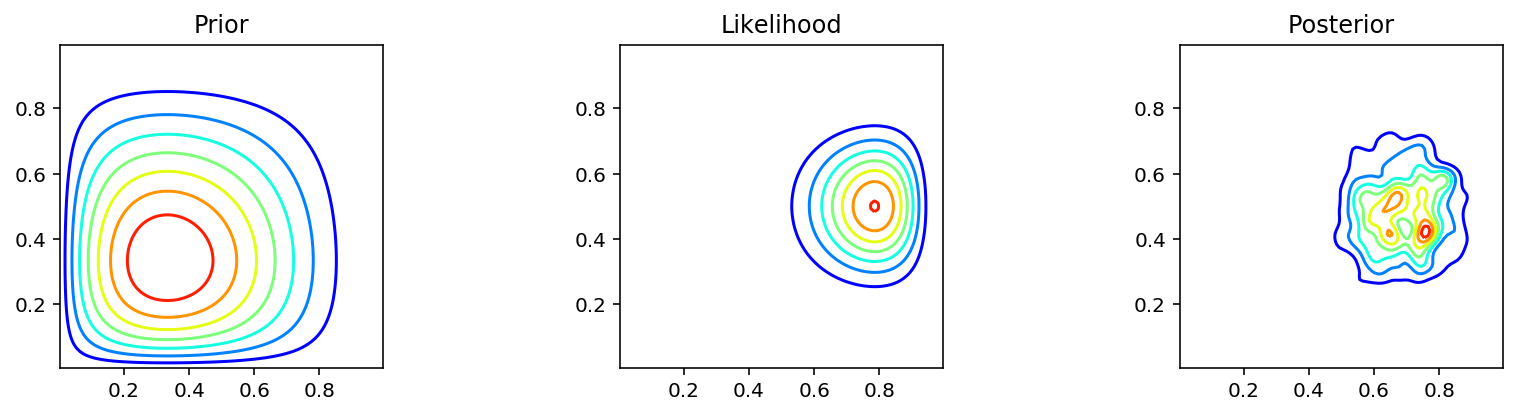

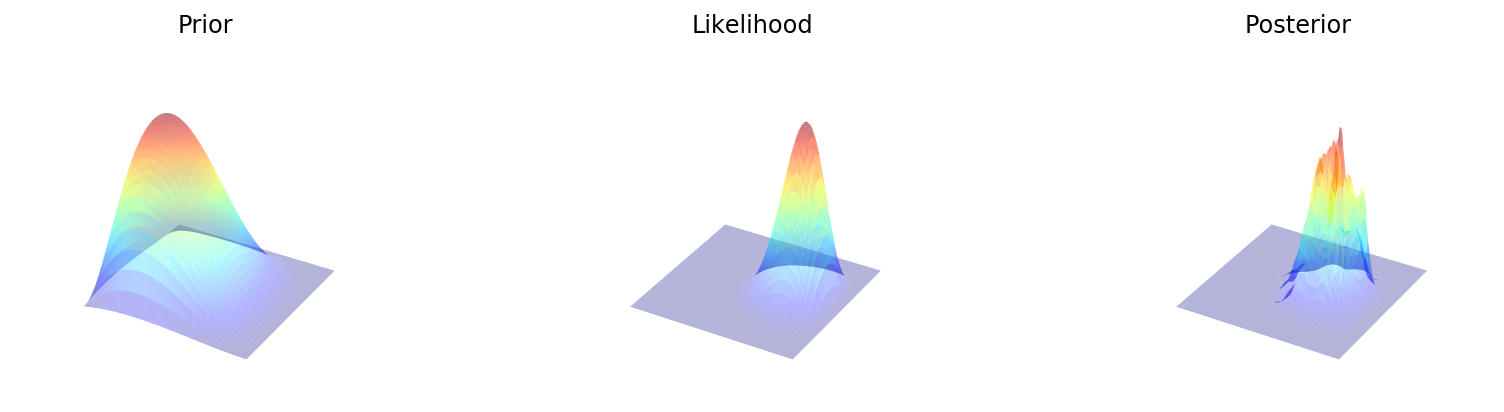

In [10]:
kde = stats.gaussian_kde(thetas.T)
XY = np.vstack([X.ravel(), Y.ravel()])
posterior = kde(XY).reshape(X.shape)
make_plots(X, Y, prior(X, Y), lik(X, Y), posterior)
make_plots(X, Y, prior(X, Y), lik(X, Y), posterior, projection='3d')

#### EXERCISE 2: SOLUTION

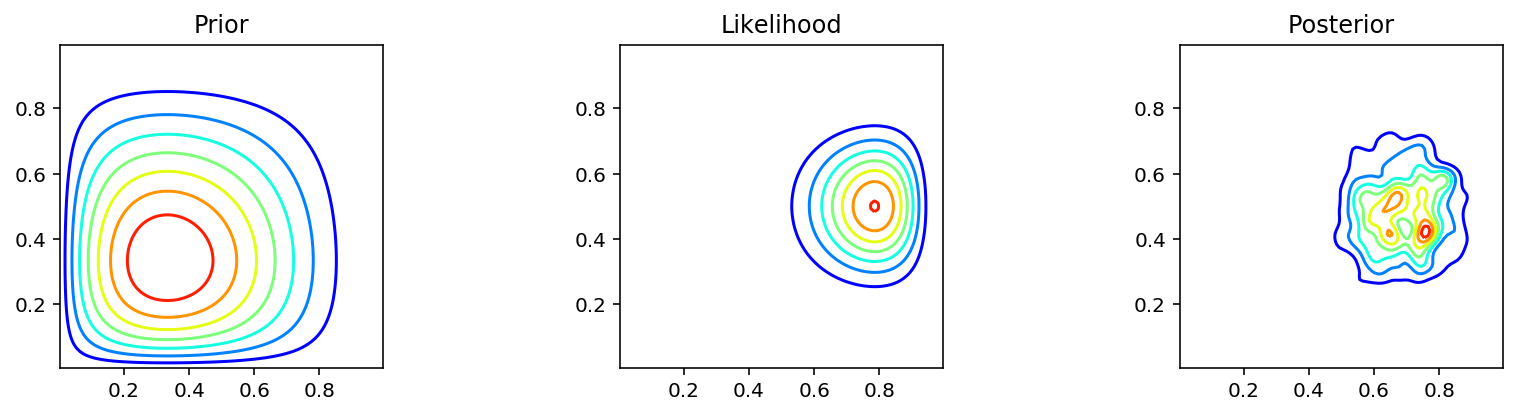

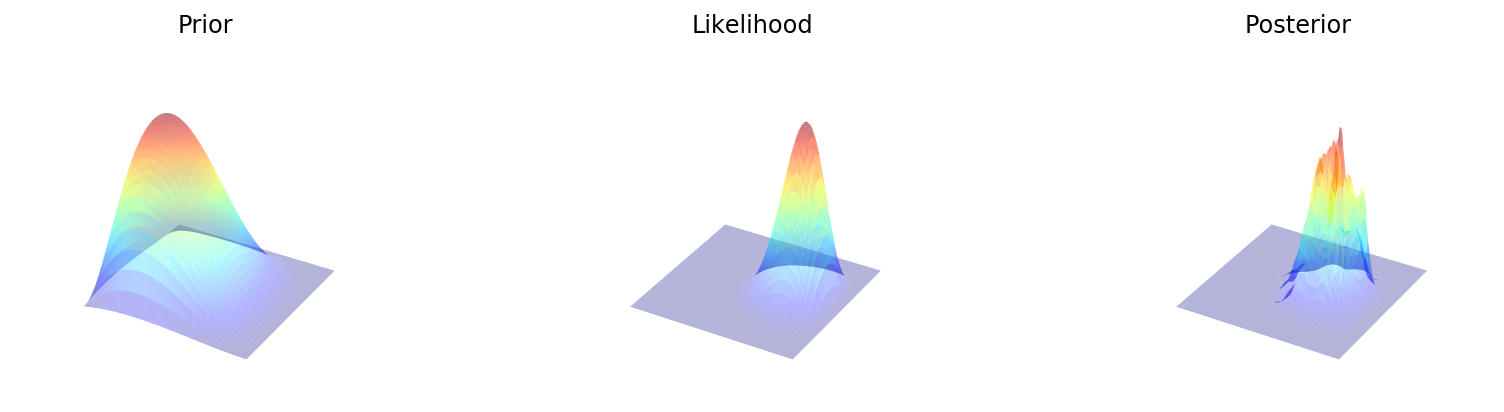

In [11]:
a = 2
b = 3

z1 = 11
N1 = 14
z2 = 7
N2 = 14

prior = lambda theta1, theta2: stats.beta(a, b).pdf(theta1) * stats.beta(a, b).pdf(theta2)
lik = partial(bern2, z1=z1, z2=z2, N1=N1, N2=N2)
target = lambda theta1, theta2: prior(theta1, theta2) * lik(theta1, theta2)

theta = np.array([0.5, 0.5])
niters = 10000
burnin = 500
sigma = np.diag([0.2,0.2])

thetas_gibbs = np.zeros((niters-burnin, 2), np.float)
for i in range(niters):
    
    ### HERE IS THE REQUIRED CODE
    theta = [stats.beta(a + z1, b + N1 - z1).rvs(), theta[1]]
    theta = [theta[0], stats.beta(a + z2, b + N2 - z2).rvs()]
    ### END EDIT    
        
    if i >= burnin:
        thetas_gibbs[i-burnin] = theta
        
kde = stats.gaussian_kde(thetas.T)
XY = np.vstack([X.ravel(), Y.ravel()])
posterior_gibbs = kde(XY).reshape(X.shape)
make_plots(X, Y, prior(X, Y), lik(X, Y), posterior_gibbs)
make_plots(X, Y, prior(X, Y), lik(X, Y), posterior_gibbs, projection='3d')

You can find this code and more explanation about Metropolis and Gibbs sampling on <a href="http://people.duke.edu/~ccc14/sta-663-2016/16A_MCMC.html#Metropolis">this page</a>.

### Estimating the MCMC parameters

We have seen several examples of MCMC and how we can use this technique to explore the parameter space. When deciding which algorithm to use, we must aim for:

* Values in the chain that are representative of the posterior distribution
* Values in the chain that are of sufficient size so that estimates are accurate and stable
* The chain should be generated efficiently, with as few steps as possible

Remember that in principle, the mathematics of MCMC guarantee that an infinitely long chain will completely explore the parameter space and return a perfect representation of the posterior distribution. However, we are usually not working with infinite time! So efficiency is important. As models increase in complexity, checking their MCMC chains can be more important and more challenging.

There is no single universally best method for conducting checks like these, but visually examining the trajectory and considering a numerical description of convergence are two methods that current practice usually focuses on.

We have already discussed effective sample size (ESS), which essentially measures the amount of autocorrelation in a chain - that is, the correlation of the chain values with the values $k$ steps ahead - compared with the actual sample size. If the chain is highly autocorrelated, its *autocorrelation function* (ACF) will remain highly above zero for large lags, which means that the chain changes only gradually from step to step and remains highly clumpy.

Formally, the effective sample size can be expressed as:

$$\textrm{ESS} = N \bigg/ \bigg(1 + 2 \sum_{k=1}^{\infty} \textrm{ACF}(k) \bigg)$$

where $N$ is the actual number of steps in the chain. In general, the larger the ESS, the better the exploration of the parameter space.

Various visual diagnostics can be plotted; the example below shows the first 500 steps in three chains generated by starting a Metropolis algorithm at three different initial values, with proposal SD = 0.02 for data $z = 35$ and $N = 50$. You can see in the left panel that all three start to converge on the same parameter value by around 300 steps, with the light blue chain taking the longest. The right panel shows the autocorrelation of all three chains at different lags.

It appears here that the light blue chain is the least efficient; however, for all MCMC algorithms, the first few hundred to few thousand steps (known as the *burn-in* period) are usually discounted to give the algorithm time to move to the modal region of the posterior. After this time, if the chains are still not overlapping, there may be a failure of the algorithm to converge. In this instance, the chains are moving relatively slowly, which may be a sign of inefficiency.

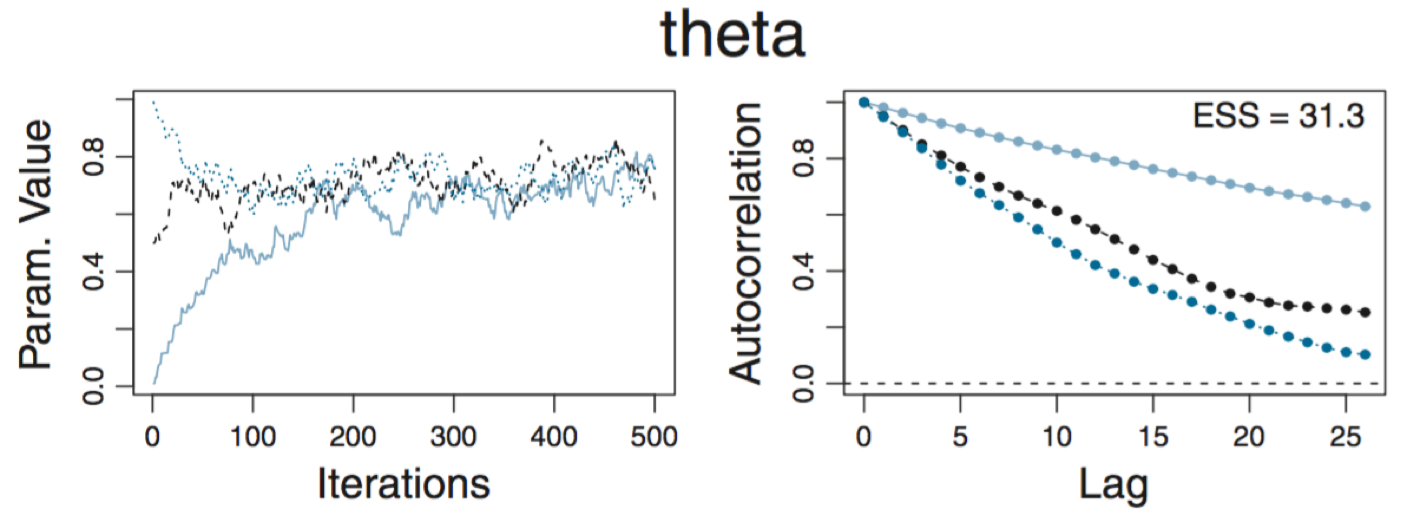

Image description: two panels. The panel on the left shows iterations (0-500) vs. parameter value (0-1). It contains three different traces, which start at arbitrary parameter values at iteration 1 and eventually converge on each other by iteration 500. The right panel shows lag (0-25) vs. autocorrelation (0-1). It also contains three traces, which correspond to those in the left panel. These all decrease with decreasing lag, showing the corresponding decrease in autocorrelation. The graph is labelled ESS = 31.3, which is a relatively low effective sample size.

#### EXERCISE 3

Plot the autocorrelation function and calculate the effective sample size (ESS) for the island chain example above. Use the following function to help you.

In [12]:
def autocorr(x):
    result = np.correlate(x, x, mode='full')
    return result[result.size // 2:]/result.max()

In [ ]:
N = 

In [ ]:
acf = 

In [ ]:
plt.plot(

In [ ]:
sum_acf = 

In [ ]:
ESS = 

#### EXERCISE 3: Solution

In [13]:
N = len(islands_visited)

In [14]:
acf = autocorr(islands_visited)

Text(0, 0.5, 'Autocorrelation')

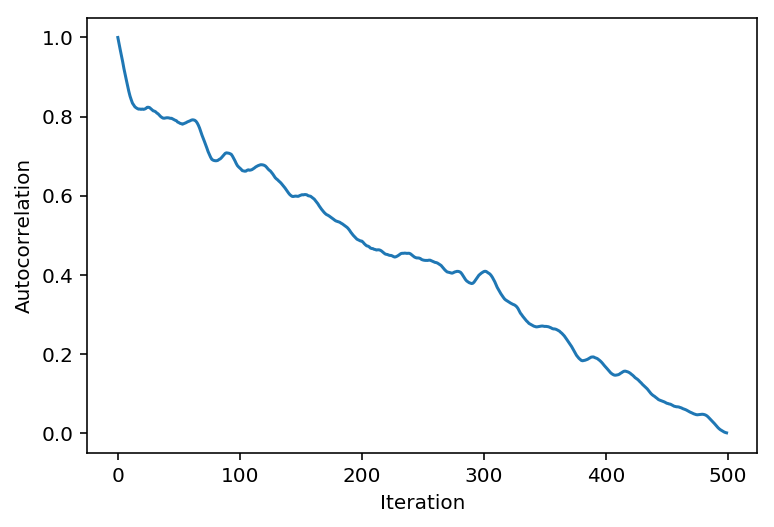

In [15]:
plt.plot(acf)
plt.xlabel('Iteration')
plt.ylabel('Autocorrelation')

In [16]:
sum_acf = acf.sum()

In [17]:
ESS = N / (1 + 2*sum_acf)
ESS

1.1474501692761845

This notebook makes up one part of this module. Now that you have completed this part, please proceed to the next notebook in this module.

If you have any questions, please reach out to your peers using the discussion boards. If you and your peers are unable to come to a suitable conclusion, do not hesitate to reach out to your instructor on the designated discussion board.